In [54]:
#Loading Dataset
import numpy as np
import pandas as pd

In [55]:
data=pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Placement_Data_Full_Class.csv")
data.drop(['ssc_b','hsc_b','hsc_s','degree_t','salary'],axis=1,inplace=True)
data.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


In [56]:
data.shape

(215, 10)

In [57]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
hsc_p             0
degree_p          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [58]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
hsc_p             0
degree_p          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [59]:
#preprocessing
#encoding
data['gender'].value_counts() #make data numerical

gender
M    139
F     76
Name: count, dtype: int64

In [60]:
data["gender"]=data.gender.map({"M":0,"F":1})
data["workex"]=data.workex.map({"No":0,"Yes":1})
data["status"]=data.status.map({"Not Placed":0,"Placed":1})
data["specialisation"]=data.specialisation.map({"Mkt&HR":0,"Mkt&Fin":1})



In [61]:
data

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,82.00,77.60,0,91.0,1,74.49,1
211,212,0,58.00,60.00,72.00,0,74.0,1,53.62,1
212,213,0,67.00,67.00,73.00,1,59.0,1,69.72,1
213,214,1,74.00,66.00,58.00,0,70.0,0,60.23,1


In [62]:
#balance dataset(for output model) so that MODEL not biased
data['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [63]:
from sklearn.utils import resample

# Separate the majority and minority classes
data_majority = data[data['status'] == 1]
data_minority = data[data['status'] == 0]

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=42) # reproducible results

# Combine majority class with upsampled minority class
balanced_data = pd.concat([data_majority, data_minority_upsampled])

In [64]:
balanced_data['status'].value_counts()

status
1    148
0    148
Name: count, dtype: int64

In [65]:
#train test split
# Seperating Features and Target
X = balanced_data.copy().drop('status', axis=1)
y = balanced_data['status']
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((207, 9), (207,), (89, 9), (89,))

In [66]:
#feature scaling(equal importance for to all columns)
# scale each features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.52112676, 0.        , 0.20661157, ..., 0.21097046, 0.        ,
        0.38489796],
       [0.91549296, 0.        , 0.51652893, ..., 0.71729958, 0.        ,
        0.31591837],
       [0.82159624, 0.        , 0.45454545, ..., 0.79113924, 0.        ,
        0.38693878],
       ...,
       [0.88262911, 0.        , 0.42975207, ..., 0.14767932, 1.        ,
        0.20081633],
       [0.84037559, 1.        , 0.76033058, ..., 0.53797468, 0.        ,
        0.85428571],
       [0.91079812, 0.        , 0.22727273, ..., 0.18987342, 1.        ,
        0.5522449 ]])

In [69]:
#1 k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
knn_Y_pred=knn.predict(X_test)
knn_Y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0], dtype=int64)

In [71]:
knn_accuracy=knn.score(X_test,Y_test)
knn_accuracy

0.8426966292134831

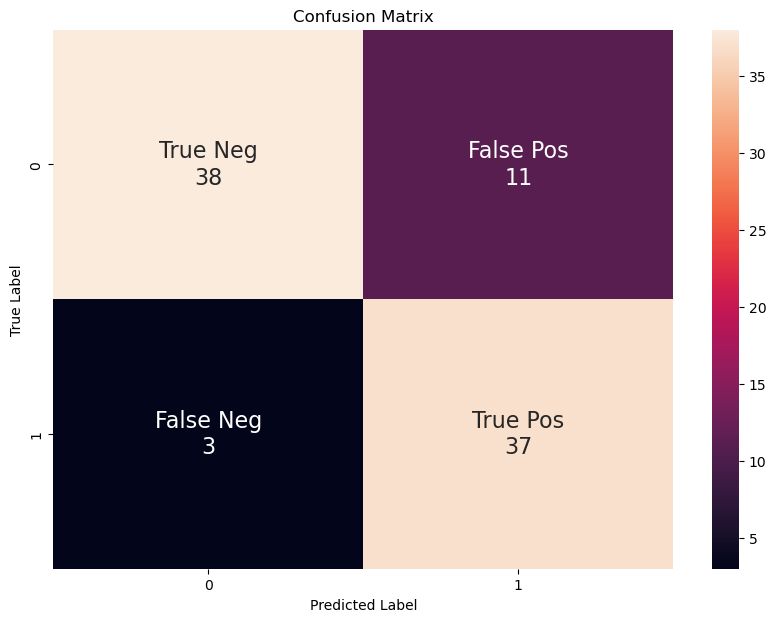

In [72]:
# creating confusion matrix heatmap
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(Y_test, knn_Y_pred)
fig = plt.figure(figsize=(10,7))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree_Y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_test, Y_test)
decision_tree_accuracy

0.9101123595505618

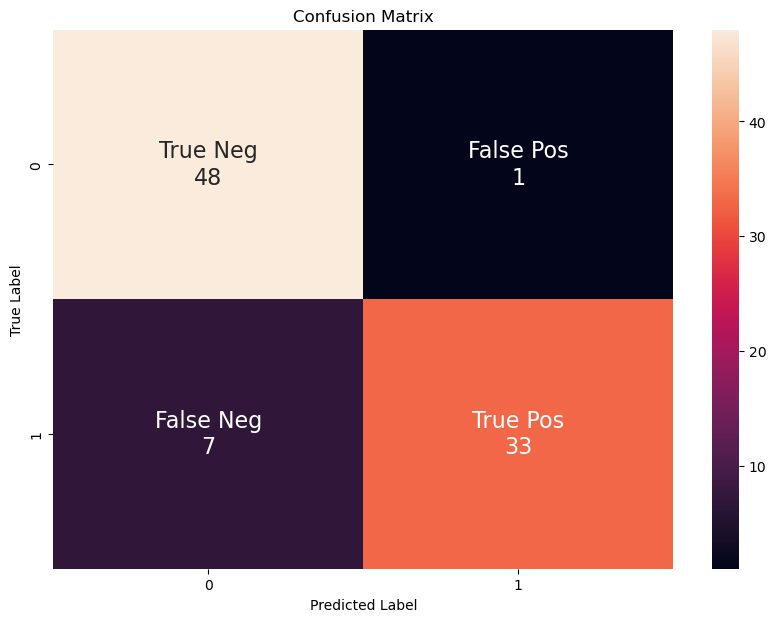

In [74]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, decision_tree_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [75]:
#SVM
# Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
svm_Y_pred = svc.predict(X_test)
svc_accuracy = svc.score(X_test, Y_test)
svc_accuracy

0.8876404494382022

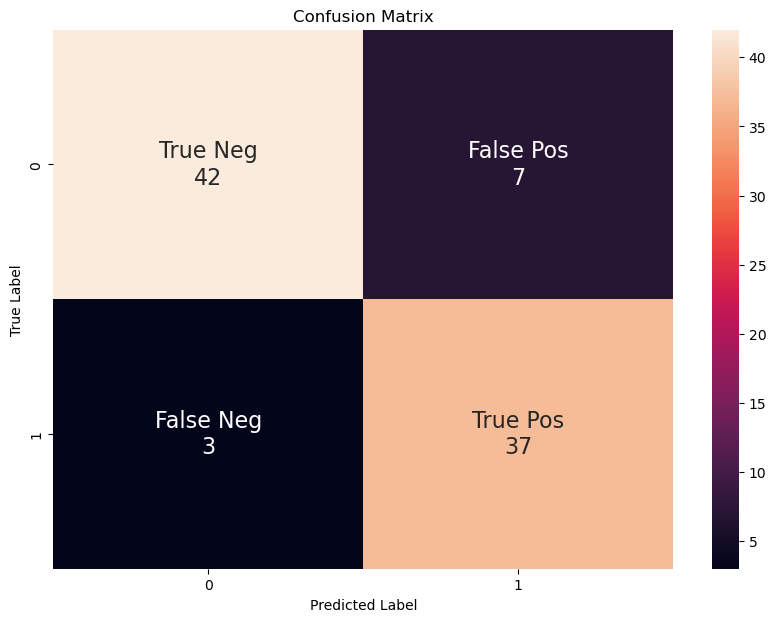

In [76]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, svm_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [77]:
#random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
random_forest_accuracy = random_forest.score(X_test, Y_test)
random_forest_accuracy

0.9550561797752809

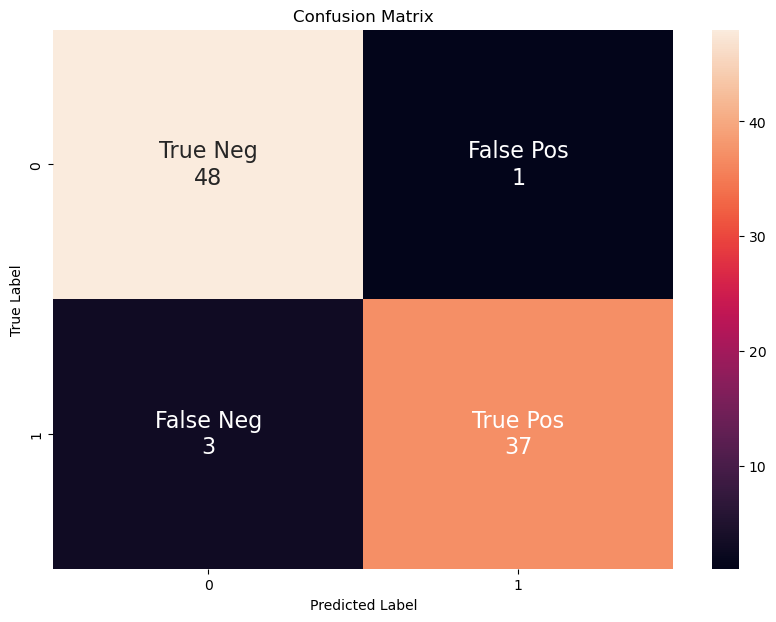

In [78]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [79]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gaussian_Y_pred = gaussian.predict(X_test)
gaussian_accuracy = gaussian.score(X_test, Y_test)
gaussian_accuracy


0.8539325842696629

In [80]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)
lg_Y_pred = lg.predict(X_test)
lg_accuracy = lg.score(X_test, Y_test)
lg_accuracy


0.8651685393258427

In [81]:
#Single Input Predictions
print("Predicted Class :",random_forest.predict(X_train[10].reshape(1,-1))[0])
print("Actual Class:", Y_test.iloc[10])

Predicted Class : 1
Actual Class: 1


In [82]:
#Predictive system
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    data = {
    'sl_no': [sl_no],
    'gender': [gender],
    'ssc_p': [ssc_p],
    'hsc_p': [hsc_p],
    'degree_p': [degree_p],
    'workex': [workex],
    'etest_p': [etest_p],
    'specialisation': [specialisation],
    'mba_p': [mba_p]
    }
    data = pd.DataFrame(data)
    data['gender'] = data['gender'].map({'M':1,"F":0})
    data['workex'] = data['workex'].map({"Yes":1,"No":0})
    data['specialisation'] = data['specialisation'].map({"Mkt&HR":1,"Mkt&Fin":0})
    scaled_df = scaler.fit_transform(data)
    result = random_forest.predict(scaled_df).reshape(1, -1)
    return result[0]

In [83]:
sl_no =11
gender = "F"
ssc_p =58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

result = prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)

if result == 1:
    print('place')

else:
    print('not place')

not place


In [84]:
#Save Files
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))
pickle.dump(scaler,open("scaler.pkl",'wb'))